In [2]:
# Import.
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from models.rbm import RBM
from utils import (
    load_alphadigit,
    read_alpha_digit,
    plot_characters_alphadigit,
    plot_original_and_generated_images
)

In [3]:
DATA_FOLDER = "../data/"
RESULTS_FOLDER = "../results/"
WEIGHTS_FOLDER = os.path.join(RESULTS_FOLDER, "weights")
ALPHA_DIGIT_PATH = os.path.join(DATA_FOLDER, "binaryalphadigs.mat")

for path in [ALPHA_DIGIT_PATH, WEIGHTS_FOLDER]:
    if not os.path.exists(path):
        raise FileNotFoundError(f"The file {path} does not exist.")

SEED = 42

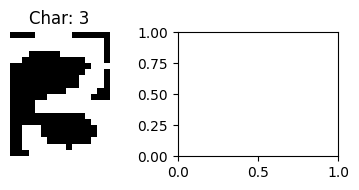

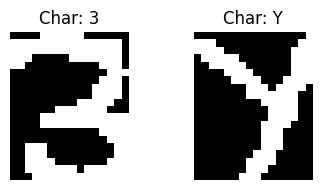

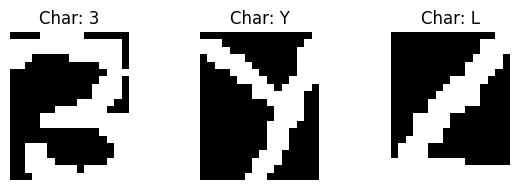

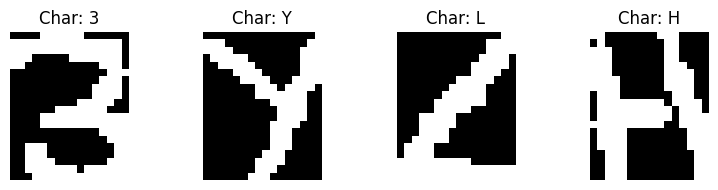

Original data: (36, 39)
Original data (unstack samples -> flatten images): (1365, 320)
Subset (39 characters) data  (39, 320)
Subset (78 characters) data  (78, 320)
Subset (117 characters) data  (117, 320)
Subset (156 characters) data  (156, 320)


In [4]:
alphadigit = load_alphadigit(ALPHA_DIGIT_PATH)

chars_1 = [3]
chars_2 = chars_1 + ["Y"]
chars_3 = chars_2 + ["L"]
chars_4 = chars_3 + ["H"]
chars_list = [chars_1, chars_2, chars_3, chars_4]
data_alphas = [
    read_alpha_digit(chars, data=alphadigit, use_data=True) 
    for chars in [chars_1, chars_2, chars_3, chars_4]
]

all_chars = np.arange(0, 35).tolist()
alphadigit_data = read_alpha_digit(all_chars, data=alphadigit, use_data=True) # read all characters

for chars, data_alpha in zip(chars_list, data_alphas):
    plot_characters_alphadigit(chars, data_alpha)

print("Original data:", alphadigit.shape)
print("Original data (unstack samples -> flatten images):", alphadigit_data.shape)
for i, data_alpha in enumerate(data_alphas):
    print(f"Subset ({len(data_alpha)} characters) data ", data_alpha.shape)

RBM(n_visible=320, n_hidden=256)
Epoch 0. Reconstruction error: 0.07241586538461539.
Epoch 500. Reconstruction error: 0.007431891025641025.
Epoch 1000. Reconstruction error: 0.003405448717948718.
Epoch 1500. Reconstruction error: 0.002043269230769231.
Epoch 2000. Reconstruction error: 0.0012219551282051282.
Epoch 2500. Reconstruction error: 0.0008814102564102564.
Epoch 3000. Reconstruction error: 0.001001602564102564.
Epoch 3500. Reconstruction error: 0.0008413461538461539.
Epoch 4000. Reconstruction error: 0.00078125.
Epoch 4500. Reconstruction error: 0.0006209935897435897.
Epoch 4999. Reconstruction error: 0.0005608974358974359.


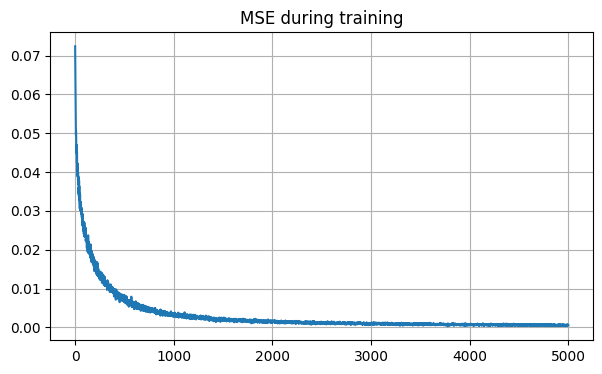

[0.07241586538461539,
 0.06921073717948718,
 0.06318108974358974,
 0.06237980769230769,
 0.05977564102564103,
 0.0555088141025641,
 0.05643028846153846,
 0.05172275641025641,
 0.04957932692307692,
 0.05062099358974359,
 0.05026041666666667,
 0.047856570512820516,
 0.046314102564102566,
 0.04709535256410256,
 0.045072115384615384,
 0.04481169871794872,
 0.04649439102564103,
 0.045072115384615384,
 0.04234775641025641,
 0.04521233974358974,
 0.04130608974358974,
 0.04110576923076923,
 0.040364583333333336,
 0.040825320512820513,
 0.04142628205128205,
 0.03884214743589744,
 0.03968349358974359,
 0.0421474358974359,
 0.040625,
 0.03782051282051282,
 0.03994391025641025,
 0.03721955128205128,
 0.036758814102564104,
 0.038822115384615385,
 0.038321314102564105,
 0.037099358974358974,
 0.03435496794871795,
 0.03615785256410257,
 0.03373397435897436,
 0.034915865384615385,
 0.03782051282051282,
 0.03427483974358975,
 0.03641826923076923,
 0.032872596153846155,
 0.033874198717948716,
 0.0330929

In [7]:
data_alpha = data_alphas[3]
n_chars = data_alpha.shape[0] / 39

# Parameters
n_visible = data_alpha.shape[1]  # Number of visible units (size of each image)
n_hidden = 256  # Number of hidden units (hyperparameter)
learning_rate = 1e-3
n_epochs = 5000
batch_size = 32
# batch_size = int(8 * n_chars)

# Initialize RBM
rbm = RBM(n_visible=n_visible, n_hidden=n_hidden, random_state=SEED)
print(rbm)

# Train RBM
rbm.train(
    input_data=data_alpha, learning_rate=learning_rate, n_epochs=n_epochs, batch_size=batch_size,
    plot_errors=True, verbose=True
)